In [1]:
import sys
sys.path.append('/home/nadzya/Apps/log-anomaly-detector/')

In [2]:
import pandas as pd
from anomaly_detector.storage.mongodb_storage import MongoDBDataStorageSource
from anomaly_detector.config import Configuration
from anomaly_detector.storage.storage_attribute import MGStorageAttribute
from anomaly_detector.core.encoder import LogEncoderCatalog

from sklearn.cluster import DBSCAN

In [3]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [159]:
def config():
    """Initialize configurations before testing."""
    cfg = Configuration()
    cfg.MG_HOST = "172.17.18.83"
    cfg.MG_PORT = 27017
    cfg.MG_CERT_DIR = ""
    cfg.MG_INPUT_DB = "anomalydb"
    cfg.MG_INPUT_COL = "utm_anomaly"
    cfg.HOSTNAME_INDEX = "hostname"
    cfg.DATETIME_INDEX = "timestamp"
    cfg.MG_USER = ''
    cfg.MG_PASSWORD = ''
    cfg.TRAIN_VECTOR_LENGTH = 25
    cfg.TRAIN_WINDOW = 5
    return cfg

In [160]:
cfg = config()
mg_attr = MGStorageAttribute(2592000, 1000)

In [161]:
mg = MongoDBDataStorageSource(cfg)

In [162]:
df_logs = mg.retrieve(mg_attr)
df = df_logs[0]

In [163]:
# Get different messages
print(len(set(df["message"])))
set(df["message"])

6


{'NovUvectrastandardcampaignsCAMPAIGNcampaignidactionADDreasonConnectiondvcdvchostdetectionIdNonehostnameavaskincurrentIPsourceidURLhttpscampaignsdstHostviyajivositecomDestinationIPdestIDexternaltimestamp',
 'datetimedevnameSLXFGVMdevidFGVMlogidtypeeventsubtypesystemlevelinformationvdrooteventtimetzlogdescDHCPstatisticsinterfaceporttotalusedmsgDHCPstatistics',
 'datetimedevnameSLXFGVMdevidFGVMlogidtypeeventsubtypesystemlevelinformationvdrooteventtimetzlogdescOutdatedreportfilesdeletedmsgDeleteoldreportfiles',
 'datetimedevnameSLXFGVMdevidFGVMlogidtypeeventsubtypesystemlevelnoticevdrooteventtimetzlogdescSystemperformancestatisticsactionperfstatscpumemtotalsessiondiskbandwidthsetupratedisklogratefazlogratefreediskstoragesysuptimemsgPerformancestatisticsaverageCPUmemoryconcurrentsessionssetuprate',
 'datetimedevnameSLXFGVMdevidFGVMlogidtypetrafficsubtypeforwardlevelnoticevdrooteventtimetzsrcipsrcnamesrcportsrcintfportsrcintfrolelandstipdstnamesiptelecombydstportdstintfportdstintfrolewanse

In [170]:
enc = LogEncoderCatalog('w2v_encoder', cfg)
enc.build()

enc.encode_log(df.loc[df["_id.$oid"] == '61a0d191b09b3295c40f7a4c'])

In [165]:
vectors = enc.one_vector(df_logs[0])

In [166]:
dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(vectors)
print(np.unique(clusters))
clusters

[-1  0  1  2  3]


array([ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1

# Visualization

## PCA

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(vectors)

In [147]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


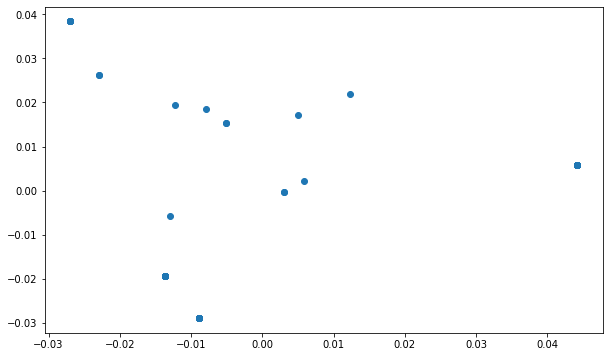

In [148]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1])

# Aggregation

In [149]:
df['cluster'] = clusters

In [154]:
messages = []
for i in list(df.loc[df['cluster'] == 0].index):
    messages.append(df_logs[1][i]["message"])

In [157]:
splited_messages = [x.split() for x in messages]

In [158]:
splited_messages[0]

['<86>Dec',
 '1',
 '11:30:01',
 'cumulus',
 'CRON[22581]:',
 'pam_unix(cron:session):',
 'session',
 'closed',
 'for',
 'user',
 'root']